## Polynomial Regression using PyTorch 

### Hemant Thapa 

#### 1. Importing Libraries 

In [1]:
import torch
import numpy as np
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt

#### 2. Creating Random dataset 

In [2]:
np.random.seed(0)
X = np.linspace(-10, 10, 1000).reshape(-1, 1)  
y = 5 * np.sin(X) + np.random.randn(1000, 1)  

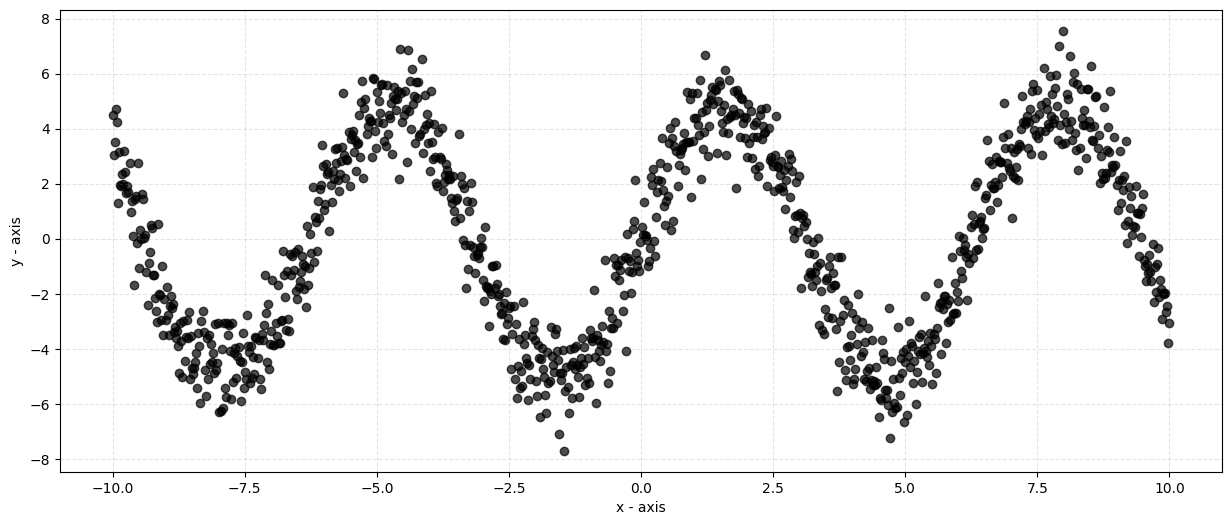

In [3]:
# scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(X,y, color='black', alpha=0.7)
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.grid(True, ls='--', alpha=0.2, color='grey')
plt.show()

#### 3. Feature Engineering 

In [4]:
X = (X - X.mean())/X.std()
y = y.ravel() 

In [5]:
X[:5]

array([[-1.73031962],
       [-1.72685552],
       [-1.72339142],
       [-1.71992731],
       [-1.71646321]])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Convert the NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  

In [9]:
# Checking dimension of train and test
print(f"{X_train.ndim} Dimensional, {y_train.ndim} Dimensional")
print(f"{X_test.ndim} Dimensional, {y_test.ndim} Dimensional")

2 Dimensional, 1 Dimensional
2 Dimensional, 1 Dimensional


In [10]:
# shape of train and test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 1), (800,), (200, 1), (200,))

#### 4. Creating Model for Polynomial Regression Analysis 

In [11]:
class PolynomialRegression(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(PolynomialRegression, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu1(x)
        x = self.hidden2(x)
        x = self.relu2(x)
        x = self.output(x)
        return x

#### 5. Training Model 

In [12]:
#one feature in X
input_size = 1  
#neurons in the first hidden layer
hidden_size1 = 20  
#neurons in the second hidden layer
hidden_size2 = 10  
#output (y)
output_size = 1  

In [13]:
# creating the model
model = PolynomialRegression(input_size, hidden_size1, hidden_size2, output_size)

# loss function (Mean Squared Error)
criterion = nn.MSELoss()

# optimizer (Adam)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Lists to store training and test losses
train_loss_values = []
test_loss_values = []

# training the model
num_epochs = 3000
for epoch in range(num_epochs):
    # zero the gradients to prevent accumulation from the previous epoch
    optimizer.zero_grad()
    # forward pass
    y_train_pred = model(X_train_tensor)
    y_test_pred = model(X_test_tensor)
    # compute losses
    train_loss = criterion(y_train_pred, y_train_tensor)
    test_loss = criterion(y_test_pred, y_test_tensor)
    # cackward pass
    train_loss.backward()
    # update model parameters
    optimizer.step()
    # append the losses to the respective lists
    train_loss_values.append(train_loss.item())
    test_loss_values.append(test_loss.item())
    
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [500/3000], Train Loss: 1.0357, Test Loss: 1.0721
Epoch [1000/3000], Train Loss: 0.9781, Test Loss: 1.0291
Epoch [1500/3000], Train Loss: 0.9340, Test Loss: 1.0168
Epoch [2000/3000], Train Loss: 0.9373, Test Loss: 1.0157
Epoch [2500/3000], Train Loss: 0.9248, Test Loss: 1.0141
Epoch [3000/3000], Train Loss: 0.9308, Test Loss: 1.0164


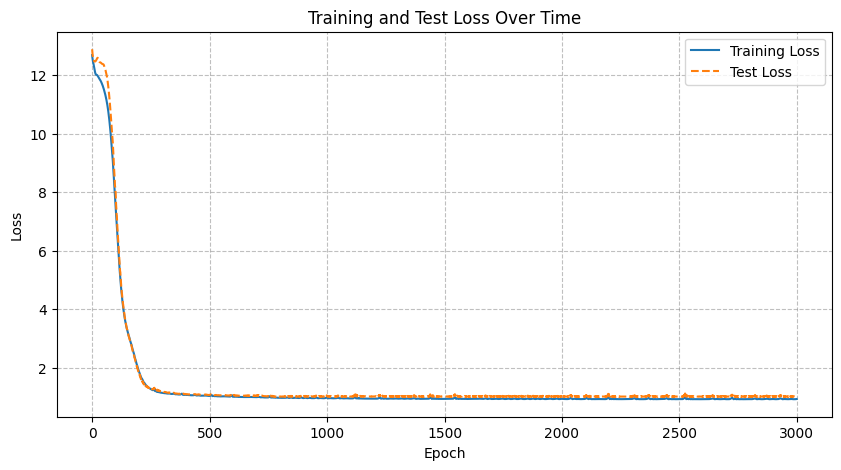

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_values, label='Training Loss')
plt.plot(test_loss_values, label='Test Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

In [15]:
# sorting X values 
X_train_sorted, indices_train = torch.sort(X_train_tensor, dim=0)
y_train_pred_sorted = model(X_train_sorted)
# sorting test X values
X_test_sorted, indices_test = torch.sort(X_test_tensor, dim=0)
y_test_pred_sorted = model(X_test_sorted)

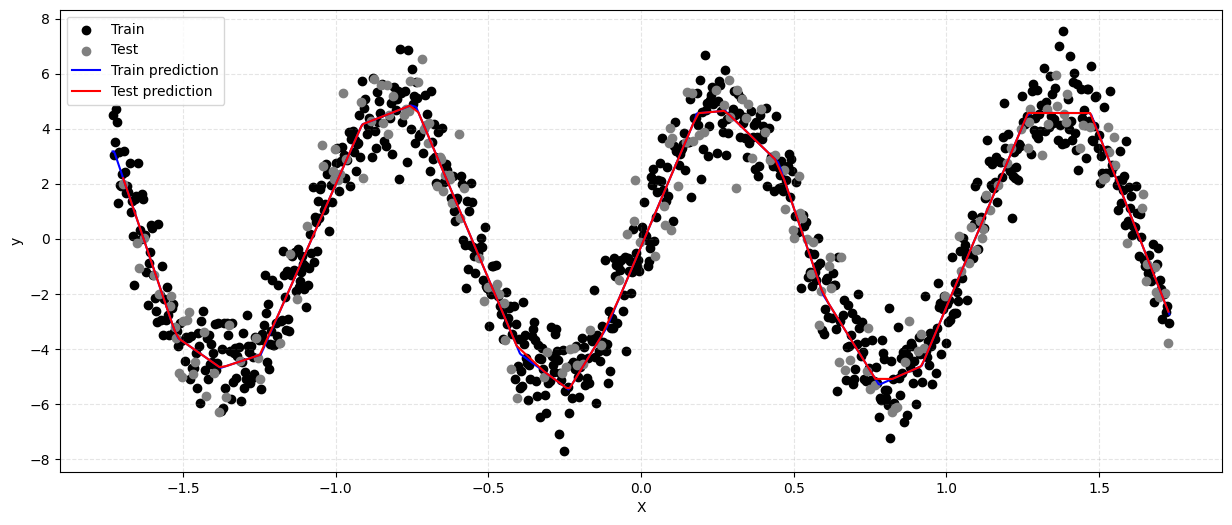

In [16]:
plt.figure(figsize=(15, 6))
plt.scatter(X_train, y_train, label='Train', color='black')
plt.scatter(X_test, y_test, label='Test', color='grey')
plt.plot(X_train_sorted.numpy(), y_train_pred_sorted.detach().numpy(), color='blue', label='Train prediction')
plt.plot(X_test_sorted.numpy(), y_test_pred_sorted.detach().numpy(), color='red', label='Test prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, ls='--', alpha=0.2, color='grey')
plt.legend()
plt.show()

#### 6. Model Evaluation 

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # predictions on training and test sets
    y_train_pred = model(X_train).detach().numpy()
    y_test_pred = model(X_test).detach().numpy()

    # Mean Squared Error (MSE)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # R-squared (R2 score)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Root Mean Squared Error (RMSE)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Mean Absolute Error (MAE)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print("Training MSE:", train_mse)
    print("Test MSE:", test_mse)
    print()
    print("Training RMSE:", train_rmse)
    print("Test RMSE:", test_rmse)
    print()
    print("Training R-squared:", train_r2)
    print("Test R-squared:", test_r2)
    print()
    print("Training MAE:", train_mae)
    print("Test MAE:", test_mae)

In [19]:
evaluate_model(model, X_train_tensor, y_train, X_test_tensor, y_test)

Training MSE: 0.9329466873353174
Test MSE: 1.032817344576341

Training RMSE: 0.9658916540354396
Test RMSE: 1.016276214705599

Training R-squared: 0.926216914062931
Test R-squared: 0.9166561259012793

Training MAE: 0.7731294716377692
Test MAE: 0.8078696714518595


#### 7. Cross Validation 

In [20]:
from sklearn.model_selection import KFold

In [21]:
# number of folds
k = 5
kf = KFold(n_splits=k)
# R-squared values for each fold
train_r_squared_values = []
test_r_squared_values = []

# k-fold cross-validation
for train_index, test_index in kf.split(X_train_tensor):
    X_train_fold, X_test_fold = X_train_tensor[train_index], X_train_tensor[test_index]
    y_train_fold, y_test_fold = y_train_tensor[train_index], y_train_tensor[test_index]
    # train the model on the current fold
    model.train()
    optimizer.zero_grad()
    y_train_pred_fold = model(X_train_fold)
    
    # R-squared for train set
    train_total_var = ((y_train_fold - y_train_fold.mean()) ** 2).sum()
    train_unexplained_var = ((y_train_fold - y_train_pred_fold) ** 2).sum()
    train_r_squared = 1 - train_unexplained_var / train_total_var
    train_r_squared_values.append(train_r_squared.item())
    
    # evaluate the model on the test set of the current fold
    model.eval()
    y_test_pred_fold = model(X_test_fold)
    
    # r-squared for test set
    test_total_var = ((y_test_fold - y_test_fold.mean()) ** 2).sum()
    test_unexplained_var = ((y_test_fold - y_test_pred_fold) ** 2).sum()
    test_r_squared = 1 - test_unexplained_var / test_total_var
    test_r_squared_values.append(test_r_squared.item())

In [22]:
print("Train R Square KFold:")
for i, r2_train in enumerate(train_r_squared_values):
    print(f'K Fold {i+1} : R Square {r2_train:.4f}')

Train R Square KFold:
K Fold 1 : R Square 0.9285
K Fold 2 : R Square 0.9256
K Fold 3 : R Square 0.9262
K Fold 4 : R Square 0.9249
K Fold 5 : R Square 0.9256


In [23]:
print("\nTest R Square KFold:")
for i, r2_test in enumerate(test_r_squared_values):
    print(f'K Fold {i+1} : R Square {r2_test:.4f}')


Test R Square KFold:
K Fold 1 : R Square 0.9167
K Fold 2 : R Square 0.9281
K Fold 3 : R Square 0.9261
K Fold 4 : R Square 0.9292
K Fold 5 : R Square 0.9276


In [24]:
# R-squared across all folds
avg_train_r_squared = np.mean(train_r_squared_values)
avg_test_r_squared = np.mean(test_r_squared_values)

print(f'\nAverage Train R-squared: {avg_train_r_squared:.4f}')
print(f'Average Test R-squared: {avg_test_r_squared:.4f}')


Average Train R-squared: 0.9262
Average Test R-squared: 0.9255


#### 8. Predictions 

In [25]:
predicted = model(X_test_tensor).detach().numpy()
predicted[:5]

array([[ 1.6588368],
       [-5.096605 ],
       [-5.0459867],
       [-0.7040534],
       [-4.9142222]], dtype=float32)

In [26]:
X_test_sorted, indices_test = torch.sort(X_test_tensor, dim=0)
predicted_sorted = model(X_test_sorted).detach().numpy()

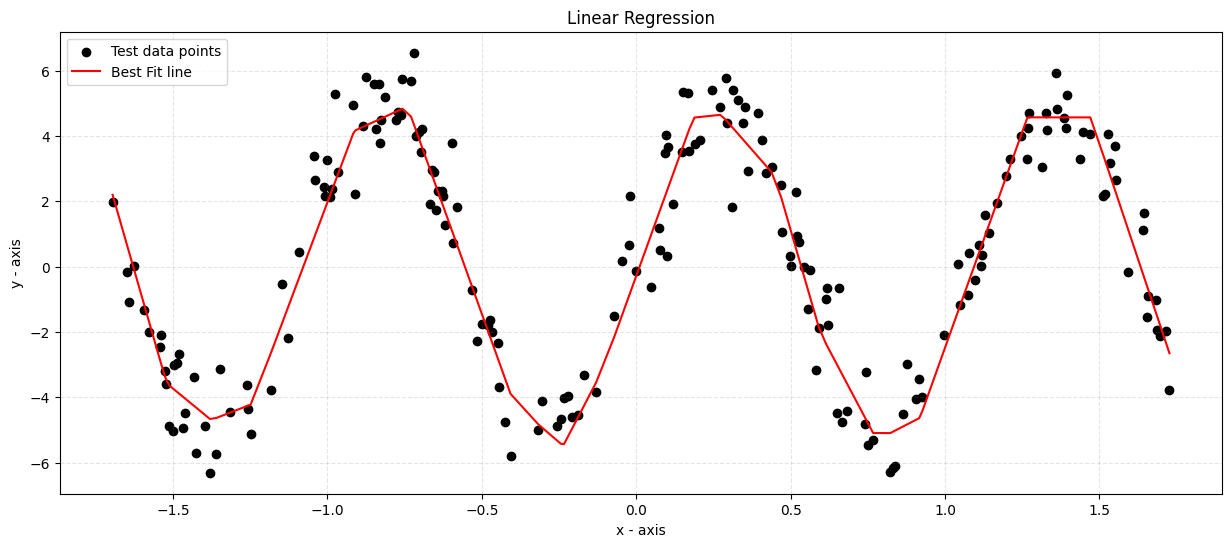

In [27]:
plt.figure(figsize=(15, 6))
plt.scatter(X_test_sorted.numpy(), y_test[indices_test], label='Test data points', color='black')
plt.plot(X_test_sorted.numpy(), predicted_sorted, color='red', label='Best Fit line')
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.title('Linear Regression')
plt.grid(True, ls='--', alpha=0.2, color='grey')
plt.legend()
plt.show()

#### 9. Residual Analaysis 

In [28]:
# residuals for both training and test sets
train_residuals = y_train - model(X_train_tensor).detach().numpy().flatten()
test_residuals = y_test - predicted.flatten()

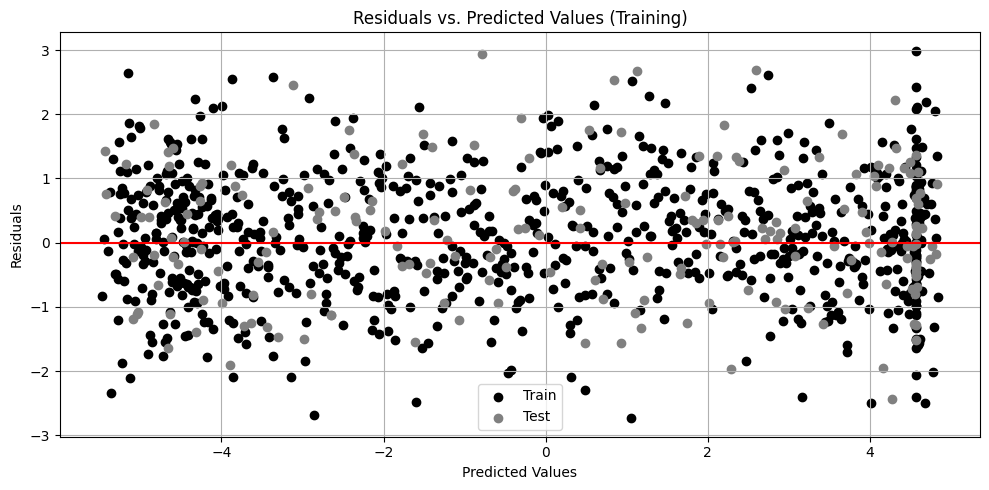

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(model(X_train_tensor).detach().numpy().flatten(), train_residuals, label='Train', color='black')
plt.scatter(predicted.flatten(), test_residuals, label='Test', color='grey')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Training)')
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

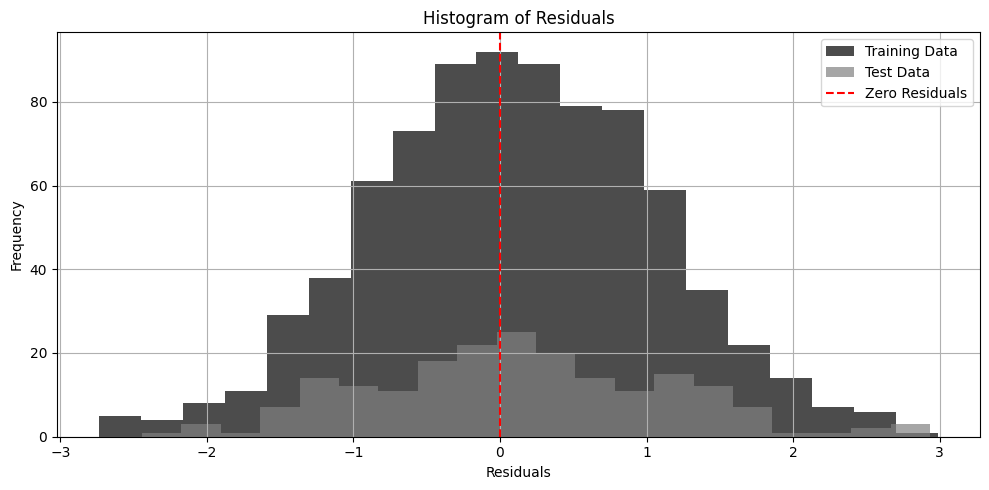

In [30]:
plt.figure(figsize=(10, 5))
plt.hist(train_residuals, bins=20, label='Training Data', alpha=0.7, color='black')
plt.hist(test_residuals, bins=20, label='Test Data', alpha=0.7, color='grey')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.axvline(x=0, color='r', linestyle='--', linewidth=1.5, label='Zero Residuals')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

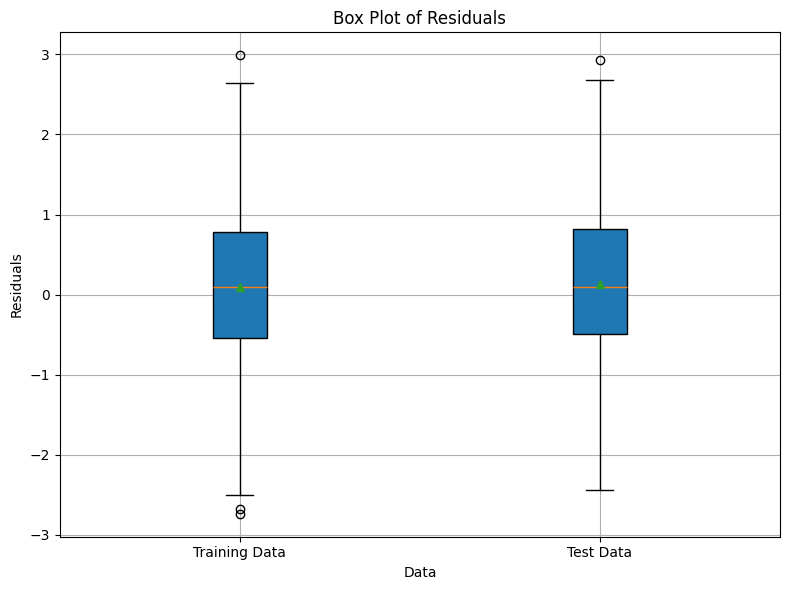

In [31]:
all_residuals = [train_residuals, test_residuals]

plt.figure(figsize=(8, 6))
plt.boxplot(all_residuals, labels=['Training Data', 'Test Data'], patch_artist=True, showmeans=True)
plt.xlabel('Data')
plt.ylabel('Residuals')
plt.title('Box Plot of Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
from scipy import stats

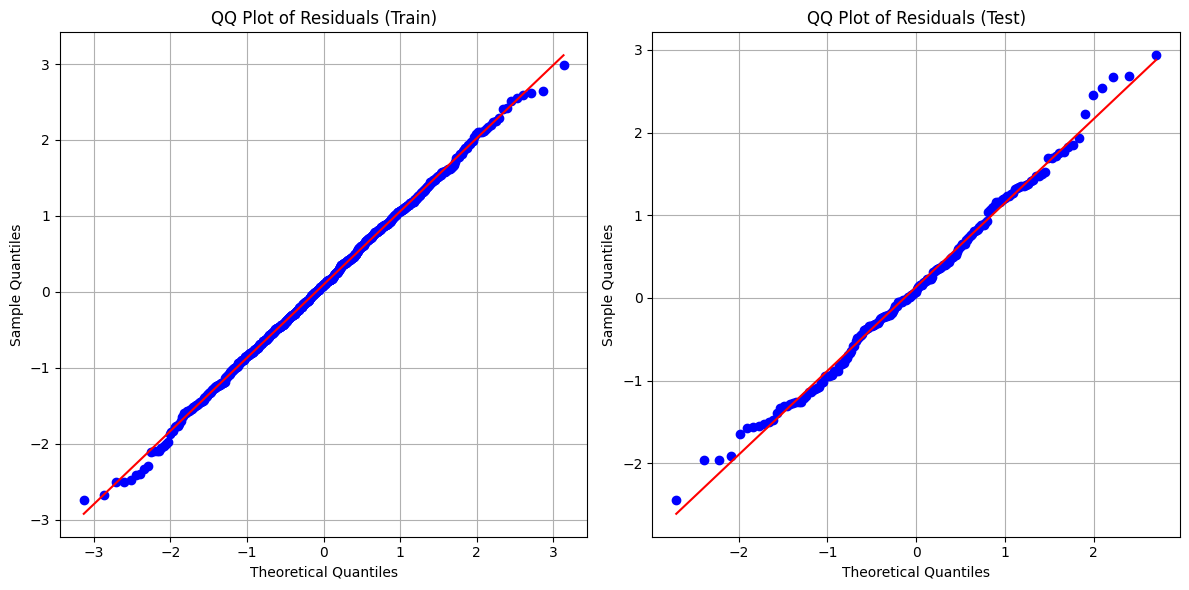

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
stats.probplot(train_residuals, dist="norm", plot=ax1)
ax1.set_title('QQ Plot of Residuals (Train)')
ax1.set_xlabel('Theoretical Quantiles')
ax1.set_ylabel('Sample Quantiles')
ax1.grid(True)

stats.probplot(test_residuals, dist="norm", plot=ax2)
ax2.set_title('QQ Plot of Residuals (Test)')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles')
ax2.grid(True)
plt.tight_layout()
plt.show()

#### References

1. Analytics Vidhya Article: [Understanding Polynomial Regression Model](https://www.analyticsvidhya.com/blog/2021/10/understanding-polynomial-regression-model/#:~:text=In%20polynomial%20regression%2C%20we%20describe,the%20conditional%20mean%20of%20y.)

2. Medium Article: [Understanding Polynomial Regression](https://medium.com/analytics-vidhya/understanding-polynomial-regression-5ac25b970e18)

3. scikit-learn Documentation: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

4. PyTorch Implementation: [Polynomial Regression with PyTorch](https://soham.dev/posts/polynomial-regression-pytorch/)
